# Graded Challenge 3 (Ensemble Learning)

# بِسْمِ ٱللّٰهِ ٱلرَّحْمٰنِ ٱلرَّحِيمِ‎
---
## Introduction

**Nama : Luthfi Fadhlillah**
<br>
**Batch : FTDS 009**

Kumpulan data yang akan digunakan berisi sekitar 10 tahun pengamatan cuaca harian dari banyak lokasi di seluruh Australia.

---


### Dataset Information

Dataset didapatkan dari https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia.
Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.

Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini di mana model pembelajaran mesin dapat sangat membantu.

---

## Import Libraries
Melakukan import pustaka yang dibutuhkan dalam proses analisis dataset.

---

In [89]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

## Data Loading

In [90]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [91]:
df = data.copy()

In [92]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [93]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


- Dataset memiliki 299 baris dan 13 kolom
- Kita memiliki informasi pribadi seperti Age, anaemia, creatinine, diabetes dll yang merupakan fitur dan DEATH_EVENT adalah label/target.

## Data Exploration

In [94]:
len(df)

299

In [95]:
df.shape

(299, 13)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [98]:
nmbr_cols = list(df.select_dtypes("number").columns)
nmbr_cols

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [99]:
df[["DEATH_EVENT"]].describe().T

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,299.0,0.32107,0.46767,0.0,0.0,0.0,1.0,1.0


### Cek Missing Values dan Duplicate Rows


In [100]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak terdapat missing values dalam datasets.

In [101]:
df.duplicated().any()

False

Tidak terdapat duplicate rows.

## Exploratory Data Analysis (EDA)

### Numerical Values

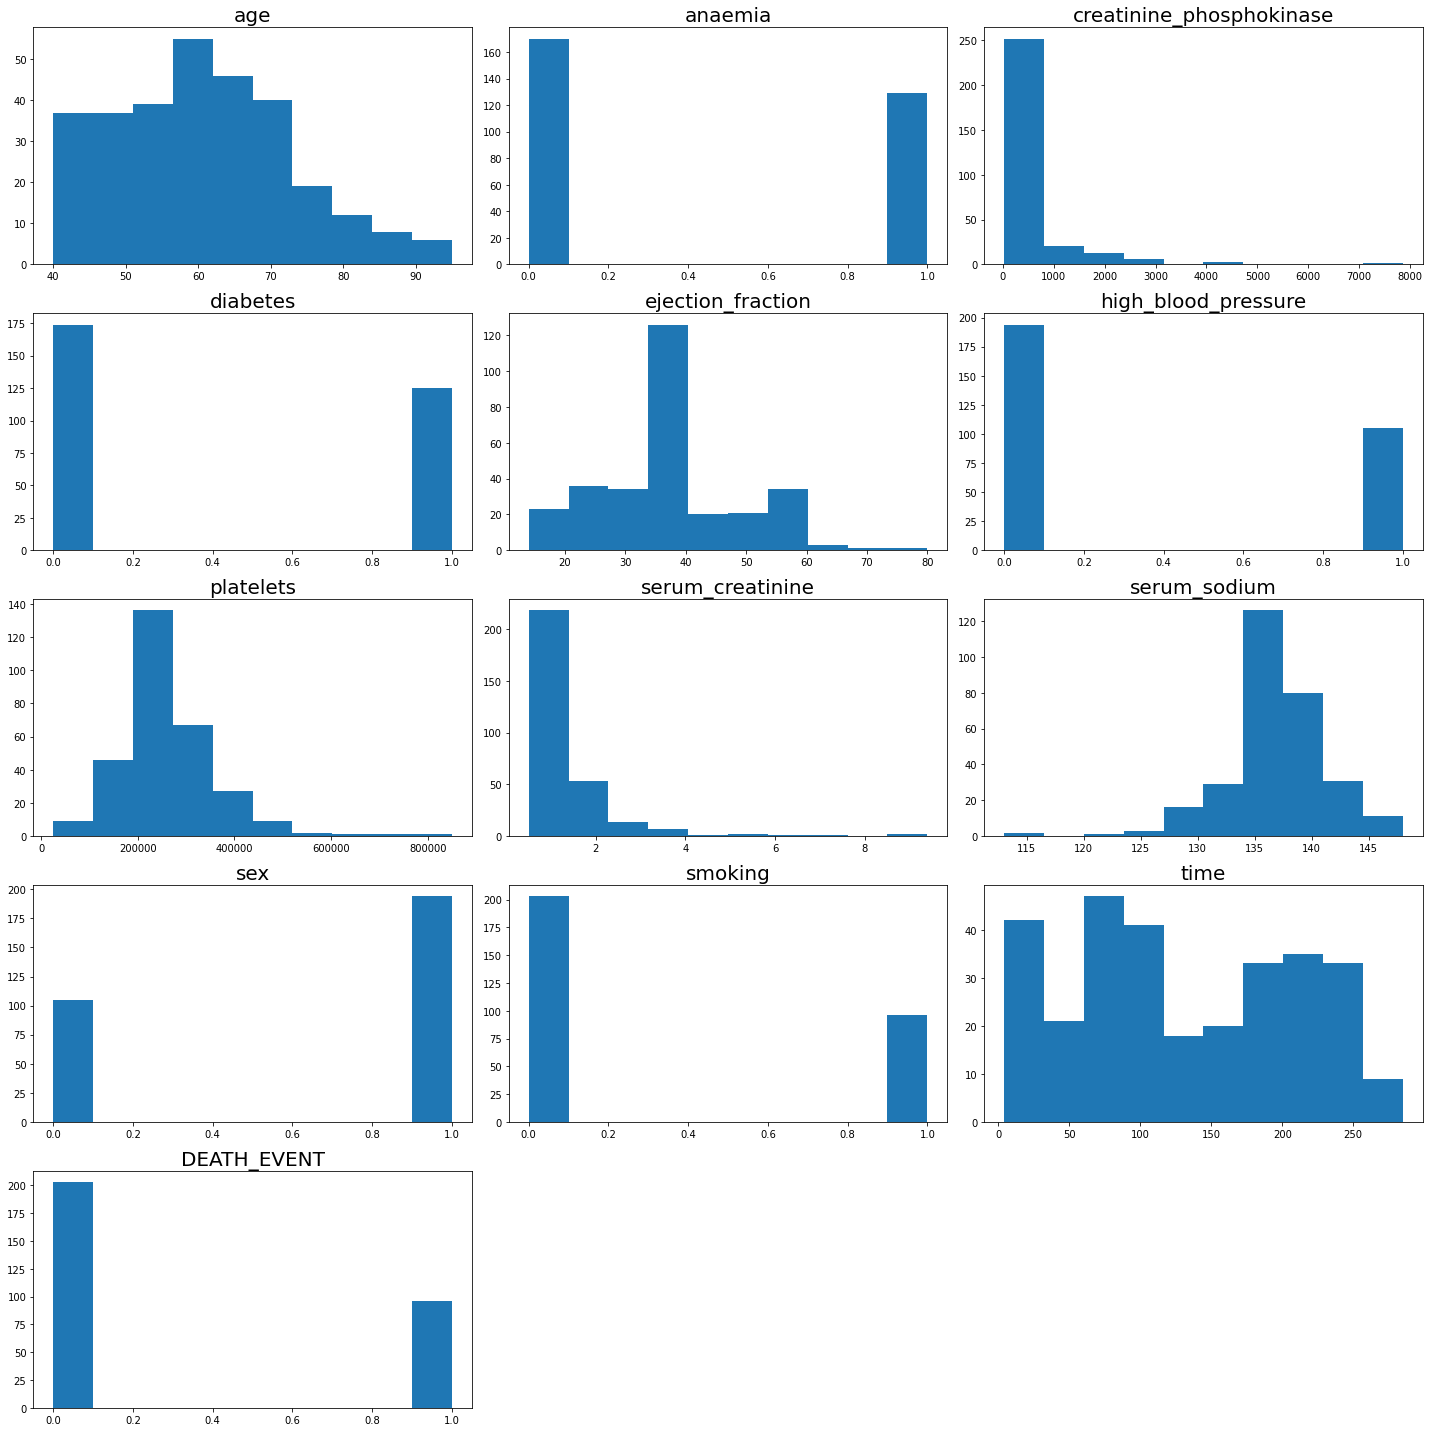

In [102]:
#Melakukan plot untuk feature numerical
plt.figure(figsize = (20, 20))
for i in range(len(nmbr_cols)):
    plt.subplot(len(nmbr_cols)//3+1, 3, i + 1)
    plt.hist(df[nmbr_cols[i]])
    plt.title(nmbr_cols[i], fontsize = 20)
plt.tight_layout()
plt.show()

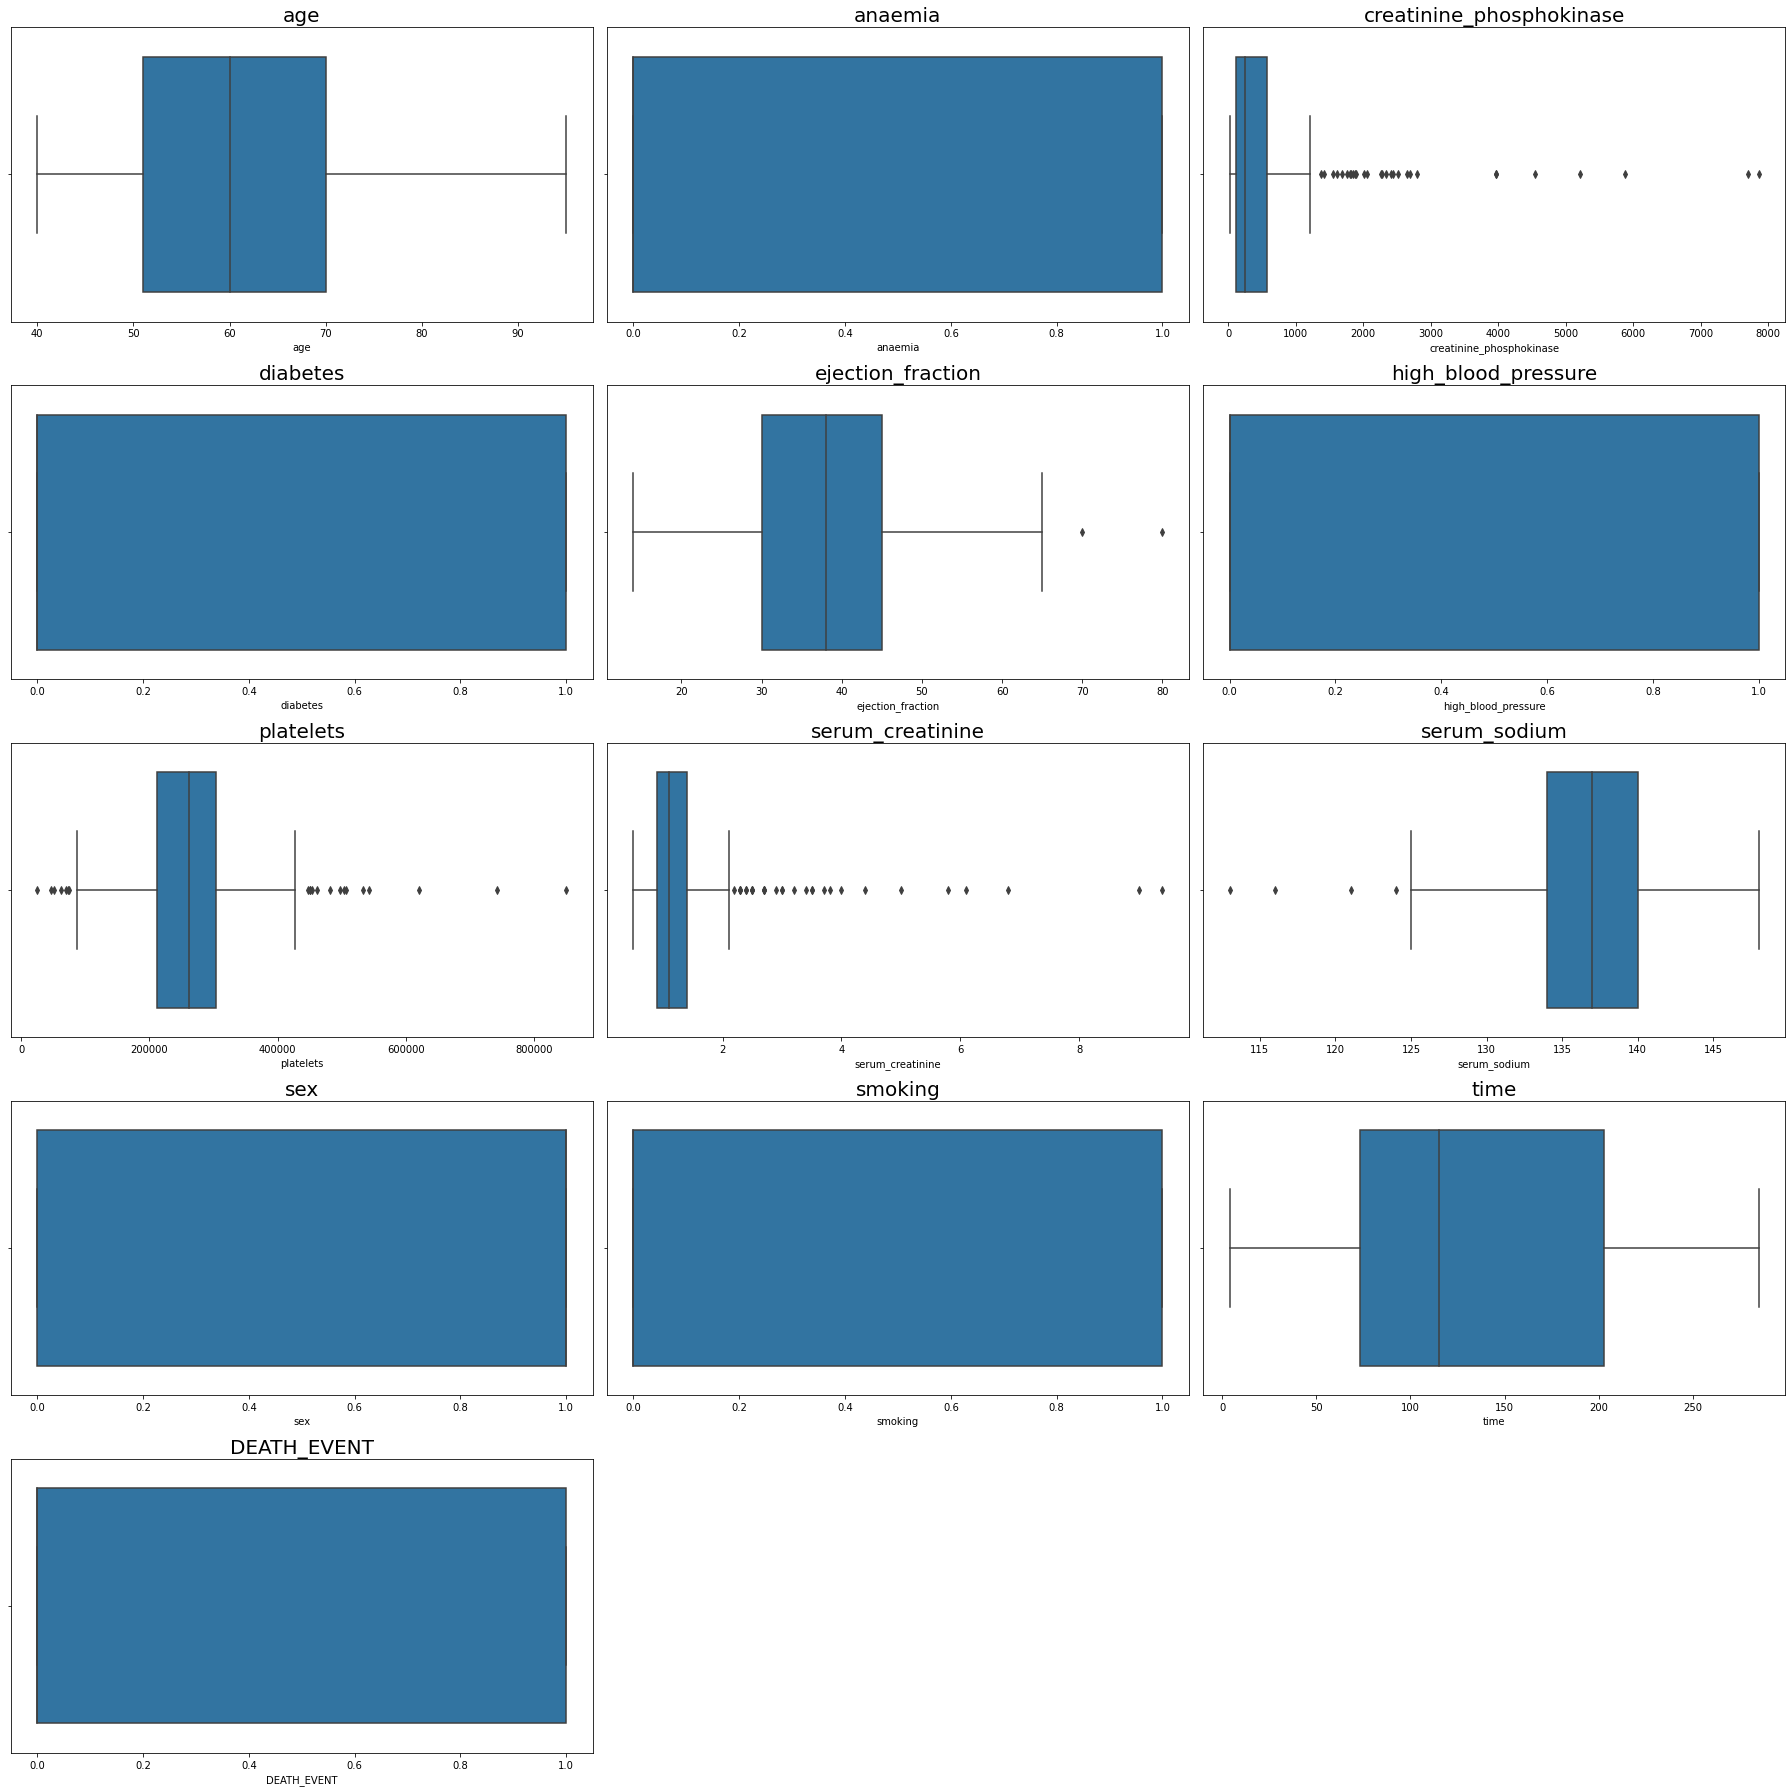

In [103]:
# melakukan plot untuk feature numerical
plt.figure(figsize = (25, 25))
for i in range(len(nmbr_cols)):
    plt.subplot(len(nmbr_cols)//3+1, 3, i + 1)
    sns.boxplot(x = df[nmbr_cols[i]])
    plt.title(nmbr_cols[i], fontsize = 20)
plt.tight_layout()
plt.show()

<AxesSubplot:>

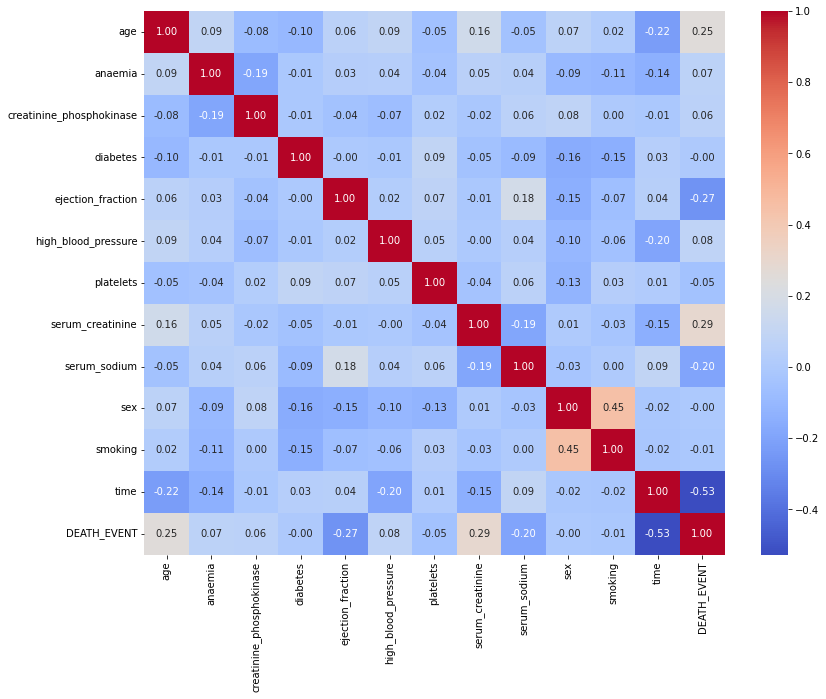

In [104]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

age, serum_creatinine feature tampaknya memiliki korelasi yang signifikan dengan probabilitas DEATH_EVENT. ejection_fraction dan serum_sodium juga berkorelasi negatif dengan DEATH_EVENT.

Ini tidak berarti bahwa fitur lain tidak berguna. Kita perlu mendalami fitur-fitur ini untuk menentukan korelasinya.

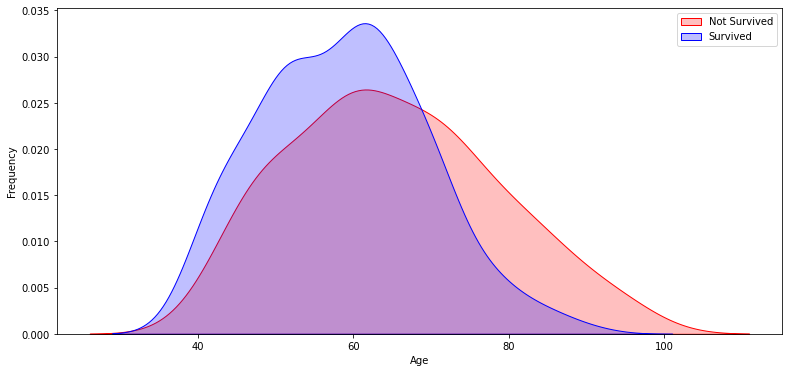

In [105]:
# Explorasi Age vs DEATH_EVENT
plt.figure(figsize=(13,6))
g = sns.kdeplot(df["age"][df["DEATH_EVENT"] == 1], color="Red", shade = True)
g = sns.kdeplot(df["age"][df["DEATH_EVENT"] == 0], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g.legend(["Not Survived","Survived"])


Ketika kita memplot `age` terhadap fitur `DEATH_EVENT`, kita bisa dengan jelas melihat peak yang menunjukan kerentanan usia terhadap tingkat kematian terjadi pada usia 40-70 an tahun sedangkan untuk bayi dan anak-anak yang sangat kecil terjadi kasus kematian.

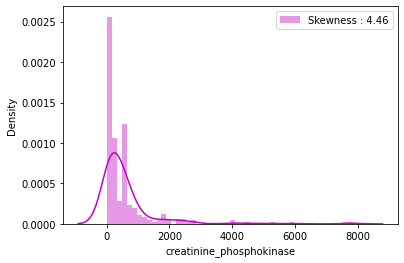

In [106]:
g = sns.distplot(df["creatinine_phosphokinase"], color="m", label="Skewness : %.2f"%(df["creatinine_phosphokinase"].skew()))
g = g.legend(loc="best")

In [107]:
df["creatinine_phosphokinase"] = df["creatinine_phosphokinase"].map(lambda i: np.log(i) if i > 0 else 0)

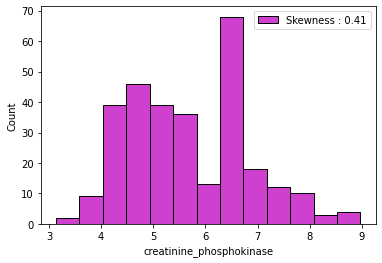

In [108]:
g = sns.histplot(df["creatinine_phosphokinase"], color="m", label="Skewness : %.2f"%(df["creatinine_phosphokinase"].skew()))
g = g.legend(loc="best")

Skewness jelas berkurang setelah transformasi log

### Categorical Values

**Anemia**

Text(0, 0.5, 'Survival Probability')

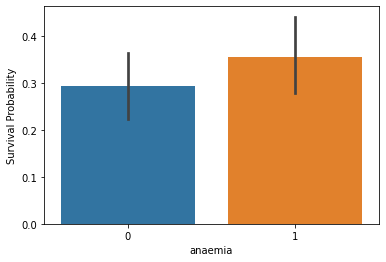

In [109]:
g = sns.barplot(x="anaemia",y="DEATH_EVENT",data=df)
g.set_ylabel("Survival Probability")

**Sex**

Text(0, 0.5, 'Survival Probability')

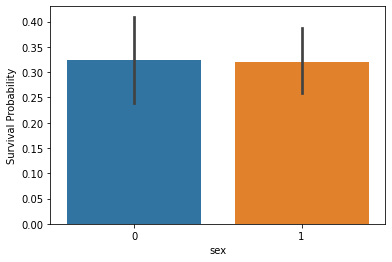

In [110]:
g = sns.barplot(x="sex",y="DEATH_EVENT",data=df)
g.set_ylabel("Survival Probability")

In [111]:
df[["sex","DEATH_EVENT"]].groupby('sex').mean()

,DEATH_EVENT
sex,
0,0.323810
1,0.319588


- Gender pasien Male = 1, Female = 0
- Menurut pengamatan Male dan Female keduanya memiliki peluang yang sama untuk bertahan hidup. Jadi Seks, mungkin tidak memainkan peran penting dalam DEATH_EVENT.

**Diabetes**

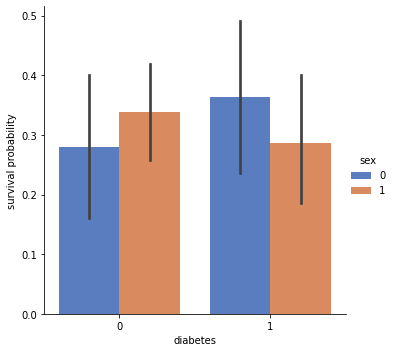

In [112]:
g = sns.catplot(x="diabetes", y="DEATH_EVENT", hue="sex", data=df,
                   kind="bar", palette="muted")
g.set_ylabels("survival probability")

Jelas bahwa wanita/female dengan diabetes memiliki lebih banyak kemungkinan heart fail

**High Blood**

Text(0, 0.5, 'Survival Probability')

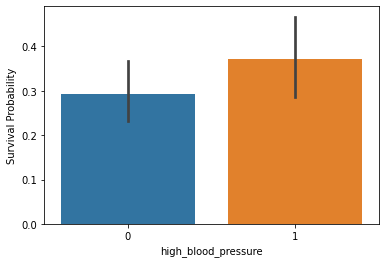

In [113]:
g = sns.barplot(x="high_blood_pressure",y="DEATH_EVENT",data=df)
g.set_ylabel("Survival Probability")

Orang dengan tekanan darah tinggi memiliki lebih banyak peluang gagal jantung.

## Data Preprocessing

In [114]:
df = pd.get_dummies(df, columns = ["anaemia"], prefix="ena")
df = pd.get_dummies(df, columns = ["diabetes"], prefix="dia")
df = pd.get_dummies(df, columns = ["high_blood_pressure"], prefix="hbp")
df = pd.get_dummies(df, columns = ["sex"], prefix="sex")
df = pd.get_dummies(df, columns = ["smoking"], prefix="smk")

In [115]:
df.time.value_counts()

250    7
187    7
10     6
186    6
107    6
      ..
97     1
96     1
86     1
77     1
285    1
Name: time, Length: 148, dtype: int64

### Data Split

In [116]:
X = df.drop(["DEATH_EVENT"], axis=1)
y = df["DEATH_EVENT"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

### Feature Selection

In [117]:
X_train_num = X_train._get_numeric_data()

## Build Pipeline

In [118]:
pipe_rf = Pipeline([
('scaler', StandardScaler()),
('rf', RandomForestClassifier(random_state=7))                    
])

pipe_cat = Pipeline([
('scaler', StandardScaler()),
('catboost', CatBoostClassifier(random_state=7))
])

pipe_xgb = Pipeline([
('scaler', StandardScaler()),
('xgb', XGBClassifier(random_state=7))
])

pipe_ada = Pipeline([
('scaler', StandardScaler()),
('ada', AdaBoostClassifier(random_state=7))
])

pipe_gb = Pipeline([
('scaler', StandardScaler()),
('gb', GradientBoostingClassifier(random_state=7))
])

pipe_bag = Pipeline([
('scaler', StandardScaler()),
('bag', BaggingClassifier(random_state=7)) 
])


## Modeling & Evaluation for Base Model


**Random Forest**

In [119]:
pipe_rf.fit(X_train, y_train)
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.9111


In [120]:
y_rf_pred = pipe_rf.predict(X_test)
y_rf_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1], dtype=int64)

In [121]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        65
           1       0.90      0.76      0.83        25

    accuracy                           0.91        90
   macro avg       0.91      0.86      0.88        90
weighted avg       0.91      0.91      0.91        90



In [122]:
print(roc_auc_score(y_test, y_rf_pred))

0.8646153846153846


**Catboost**

In [123]:
pipe_cat.fit(X_train, y_train)
print('Training Score: ',round(pipe_cat.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_cat.score(X_test, y_test),4))

Learning rate set to 0.00528
0:	learn: 0.6895359	total: 3.23ms	remaining: 3.23s
1:	learn: 0.6861820	total: 5.45ms	remaining: 2.72s
2:	learn: 0.6822901	total: 6.67ms	remaining: 2.22s
3:	learn: 0.6789030	total: 7.52ms	remaining: 1.87s
4:	learn: 0.6750390	total: 8.83ms	remaining: 1.76s
5:	learn: 0.6711209	total: 11.3ms	remaining: 1.87s
6:	learn: 0.6677110	total: 12.2ms	remaining: 1.73s
7:	learn: 0.6643921	total: 13.3ms	remaining: 1.65s
8:	learn: 0.6610464	total: 14.3ms	remaining: 1.57s
9:	learn: 0.6578111	total: 15.1ms	remaining: 1.5s
10:	learn: 0.6542639	total: 16ms	remaining: 1.44s
11:	learn: 0.6504784	total: 18.3ms	remaining: 1.5s
12:	learn: 0.6472473	total: 19.2ms	remaining: 1.46s
13:	learn: 0.6437080	total: 20.1ms	remaining: 1.41s
14:	learn: 0.6410065	total: 20.9ms	remaining: 1.37s
15:	learn: 0.6379519	total: 21.7ms	remaining: 1.34s
16:	learn: 0.6350741	total: 22.7ms	remaining: 1.31s
17:	learn: 0.6321630	total: 23.6ms	remaining: 1.29s
18:	learn: 0.6288223	total: 24.5ms	remaining: 1.2

In [124]:
y_cat_pred = pipe_cat.predict(X_test)
y_cat_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1], dtype=int64)

In [125]:
print(classification_report(y_test, y_cat_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        65
           1       0.86      0.72      0.78        25

    accuracy                           0.89        90
   macro avg       0.88      0.84      0.85        90
weighted avg       0.89      0.89      0.89        90



In [126]:
print(roc_auc_score(y_test, y_cat_pred))

0.8369230769230769


**Adaboost**

In [127]:
pipe_ada.fit(X_train, y_train)
print('Training Score: ',round(pipe_ada.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_ada.score(X_test, y_test),4))

Training Score:  0.9569
Testing Score:  0.8444


In [128]:
y_ada_pred = pipe_ada.predict(X_test)
y_ada_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0], dtype=int64)

In [129]:
print(classification_report(y_test, y_ada_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        65
           1       0.72      0.72      0.72        25

    accuracy                           0.84        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.84      0.84      0.84        90



In [130]:
print(roc_auc_score(y_test, y_ada_pred))

0.8061538461538461


**XGBoost**

In [131]:
pipe_xgb.fit(X_train, y_train)
print('Training Score: ',round(pipe_xgb.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_xgb.score(X_test, y_test),4))

[21:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Score:  1.0
Testing Score:  0.8556


In [132]:
y_xgb_pred = pipe_xgb.predict(X_test)
y_xgb_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [133]:
print(classification_report(y_test, y_xgb_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        65
           1       0.80      0.64      0.71        25

    accuracy                           0.86        90
   macro avg       0.84      0.79      0.81        90
weighted avg       0.85      0.86      0.85        90



In [134]:
print(roc_auc_score(y_test, y_xgb_pred))

0.7892307692307693


**Gradient Boost**

In [135]:
pipe_gb.fit(X_train, y_train)
print('Training Score: ',round(pipe_gb.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_gb.score(X_test, y_test),4))


Training Score:  1.0
Testing Score:  0.8889


In [136]:
y_gb_pred = pipe_gb.predict(X_test)
y_gb_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [137]:
print(classification_report(y_test, y_gb_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        65
           1       0.80      0.80      0.80        25

    accuracy                           0.89        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.89      0.89      0.89        90



In [138]:
print(roc_auc_score(y_test, y_gb_pred))

0.8615384615384616


**Bagging**

In [139]:
pipe_bag.fit(X_train, y_train)
print('Training Score: ',round(pipe_bag.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_bag.score(X_test, y_test),4))

Training Score:  0.9761
Testing Score:  0.8778


In [140]:
y_bag_pred = pipe_bag.predict(X_test)
y_bag_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1], dtype=int64)

In [141]:
print(classification_report(y_test, y_bag_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        65
           1       0.85      0.68      0.76        25

    accuracy                           0.88        90
   macro avg       0.87      0.82      0.84        90
weighted avg       0.88      0.88      0.87        90



In [142]:
print(roc_auc_score(y_test, y_bag_pred))

0.816923076923077


## Base Model Comparison

### Accuracy

In [143]:
rf = pipe_rf.score(X_test, y_test)
catboost = pipe_cat.score(X_test, y_test)
adaboost = pipe_ada.score(X_test, y_test)
xgb = pipe_xgb.score(X_test, y_test)
gb = pipe_gb.score(X_test, y_test)
bag = pipe_bag.score(X_test, y_test)

print('Random Forest : ',round(rf,2)*100, '%')
print('CatBoost : ',round(catboost,2)*100, '%')
print('AdaBoost : ',round(adaboost,2)*100, '%')
print('XGBoost : ',round(xgb,2)*100, '%')
print('Gradient Boosting : ',round(gb,2)*100, '%')
print('Bagging : ',round(bag,2)*100, '%')



Random Forest :  91.0 %
CatBoost :  89.0 %
AdaBoost :  84.0 %
XGBoost :  86.0 %
Gradient Boosting :  89.0 %
Bagging :  88.0 %


**F1 Score**

In [144]:
rf = f1_score(y_test, pipe_rf.predict(X_test))
catboost = f1_score(y_test, pipe_cat.predict(X_test))
adaboost = f1_score(y_test, pipe_ada.predict(X_test))
xgb = f1_score(y_test, pipe_xgb.predict(X_test))
gb = f1_score(y_test, pipe_gb.predict(X_test))
bag = f1_score(y_test, pipe_bag.predict(X_test))

print('Random Forest : ',round(rf,2)*100, '%')
print('CatBoost : ',round(catboost,2)*100, '%')
print('AdaBoost : ',round(adaboost,2)*100, '%')
print('XGBoost : ',round(xgb,2)*100, '%')
print('Gradient Boosting : ',round(gb,2)*100, '%')
print('Bagging : ',round(bag,2)*100, '%')


Random Forest :  83.0 %
CatBoost :  78.0 %
AdaBoost :  72.0 %
XGBoost :  71.0 %
Gradient Boosting :  80.0 %
Bagging :  76.0 %


**ROC-AUC**

In [145]:
rf = roc_auc_score(y_test, pipe_rf.predict(X_test))
catboost = roc_auc_score(y_test, pipe_cat.predict(X_test))
adaboost = roc_auc_score(y_test, pipe_ada.predict(X_test))
xgb = roc_auc_score(y_test, pipe_xgb.predict(X_test))
gb = roc_auc_score(y_test, pipe_gb.predict(X_test))
bag = roc_auc_score(y_test, pipe_bag.predict(X_test))

print('Random Forest : ',round(rf,2)*100, '%')
print('CatBoost : ',round(catboost,2)*100, '%')
print('AdaBoost : ',round(adaboost,2)*100, '%')
print('XGBoost : ',round(xgb,2)*100, '%')
print('Gradient Boosting : ',round(gb,2)*100, '%')
print('Bagging : ',round(bag,2)*100, '%')


Random Forest :  86.0 %
CatBoost :  84.0 %
AdaBoost :  81.0 %
XGBoost :  79.0 %
Gradient Boosting :  86.0 %
Bagging :  82.0 %


In [146]:
models = {
    'Random Forest': pipe_rf,
    'CatBoost': pipe_cat,
    'AdaBoost': pipe_ada,
    'XGBoost': pipe_xgb,
    'Gradient Boosting': pipe_gb,
    'Bagging': pipe_bag
}

metrics = {
    'accuracy': accuracy_score,
    'F1': f1_score,
    'AUC': roc_auc_score
}

df_model = pd.DataFrame(columns= models.keys(), index=['accuracy', 'F1', 'AUC'])

for metric in metrics:
    for model in models:
        df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [147]:
df_model

,Random Forest,CatBoost,AdaBoost,XGBoost,Gradient Boosting,Bagging
accuracy,0.911111,0.888889,0.844444,0.855556,0.888889,0.877778
F1,0.826087,0.782609,0.72,0.711111,0.8,0.755556
AUC,0.864615,0.836923,0.806154,0.789231,0.861538,0.816923


## Cross validation

In [183]:
models_dict = {}

In [184]:
models_dict["RandomForest"] = RandomForestClassifier(random_state = 14, max_depth = 30, max_features = 'auto', min_samples_leaf = 10, min_samples_split = 2, n_estimators = 100)
models_dict["AdaBoost"] = AdaBoostClassifier(random_state = 14, learning_rate = 0.1, n_estimators = 100)
models_dict["GradientBoosting"] = GradientBoostingClassifier(random_state = 14, learning_rate = 0.1, n_estimators = 100)
models_dict["Bagging"] = BaggingClassifier(random_state = 14, n_estimators = 100)
models_dict["XGBoost"] = XGBClassifier(random_state = 14, learning_rate = 0.1, n_estimators = 100)
models_dict["CatBoost"] = CatBoostClassifier(iterations = 100, learning_rate = 0.1, depth = 10, l2_leaf_reg = 0.1, random_seed = 14)

In [185]:
def display_score(scores):
    '''
    function to display cross validation mean and std.
    '''
    print(f"Scores: {scores}")
    print(f"Scores mean: {scores.mean()}")
    print(f"Scores Standar Deviation: {scores.std()}")

In [186]:
# create list to store cv scores
scores_cv = []

for model_name, model in models_dict.items():
    print(f"Cross Validation Scores of {model_name}")
    scores = cross_val_score(model, X_train, y_train, scoring = 'roc_auc', cv = 5)
    scores_cv.append(scores)
    display_score(scores)
    print("\n")

Cross Validation Scores of RandomForest
Scores: [0.92346939 0.8877551  0.88265306 0.84938272 0.88888889]
Scores mean: 0.8864298311917361
Scores Standar Deviation: 0.02352226515346011


Cross Validation Scores of AdaBoost
Scores: [0.89285714 0.89030612 0.84183673 0.85679012 0.83333333]
Scores mean: 0.8630246913580246
Scores Standar Deviation: 0.02450970310177191


Cross Validation Scores of GradientBoosting
Scores: [0.89795918 0.86734694 0.81377551 0.82222222 0.85978836]
Scores mean: 0.8522184429327287
Scores Standar Deviation: 0.030841604124528212


Cross Validation Scores of Bagging
Scores: [0.90816327 0.91836735 0.85714286 0.81234568 0.8968254 ]
Scores mean: 0.8785689090450995
Scores Standar Deviation: 0.03908358433778023


Cross Validation Scores of XGBoost
[21:18:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 

## Model Optimization

In [148]:
## parameter tuning

param_rf = {
    'scaler' : [StandardScaler(), MinMaxScaler()],
    'rf__criterion' : ['gini', 'entropy'],
    'rf__n_estimators' : np.arange(100,501, 100),
    'rf__max_depth' : np.arange(2,8,2)
}

param_cat = {
    'scaler' : [StandardScaler(), MinMaxScaler(), RobustScaler()],
    'catboost__learning_rate' : [0.1, 0.01, 0.001],
    'catboost__bagging_temperature' : [0.0, 1.0],
    'catboost__n_estimators':np.arange(100,501,100)
}

param_ada = {
    'scaler' : [StandardScaler(), MinMaxScaler()],
    'ada__learning_rate' : [0.1, 0.01, 0.001],
    'ada__n_estimators':np.arange(100,501,100)
}

param_xgb = {
    'scaler' : [StandardScaler(), MinMaxScaler()],
    'xgb__learning_rate' : [0.1, 0.01, 0.001],
    'xgb__n_estimators':np.arange(100,501,100)
}

param_gb = {
    'scaler' : [StandardScaler(), MinMaxScaler()],
    'gb__learning_rate' : [0.1, 0.01, 0.001],
    'gb__n_estimators':np.arange(100,501,100)
}

param_bag = {
    'scaler' : [StandardScaler(), MinMaxScaler()],
    'bag__n_estimators' : np.arange(100,501,100),
    'bag__max_samples' : np.arange(0.1,1.1,0.1)
}




## Model Tuning Result & Evaluation

**Random Forest**

In [149]:
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=10).fit(X_train, y_train)

In [150]:
print('Train Set Score : ', grid_rf.score(X_train, y_train))
print('Test Set Score : ', grid_rf.score(X_test, y_test))

Train Set Score :  0.9090909090909091
Test Set Score :  0.8888888888888888


In [151]:
best_param_rf = grid_rf.best_params_
print(best_param_rf)
print('\n')
best_pipe_rf = grid_rf.best_estimator_
print(best_pipe_rf)
print('\n')
result_df_rf = pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns')
print(result_df_rf.columns)

{'rf__criterion': 'entropy', 'rf__max_depth': 4, 'rf__n_estimators': 100, 'scaler': StandardScaler()}


Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=4,
                                        random_state=7))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_rf__criterion', 'param_rf__max_depth', 'param_rf__n_estimators',
       'param_scaler', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [152]:
print(classification_report(y_test, best_pipe_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        65
           1       0.89      0.68      0.77        25

    accuracy                           0.89        90
   macro avg       0.89      0.82      0.85        90
weighted avg       0.89      0.89      0.88        90



In [153]:
print(roc_auc_score(y_test, best_pipe_rf.predict(X_test)))

0.8246153846153846


**Adaboost**

In [154]:
grid_ada = GridSearchCV(pipe_ada, param_ada, cv=10).fit(X_train, y_train)

In [155]:
print('Train Set Score : ', grid_ada.score(X_train, y_train))
print('Test Set Score : ', grid_ada.score(X_test, y_test))


Train Set Score :  0.84688995215311
Test Set Score :  0.8888888888888888


In [156]:
best_param_ada = grid_ada.best_params_
print(best_param_ada)
print('\n')
best_pipe_ada = grid_ada.best_estimator_
print(best_pipe_ada)
print('\n')
result_df_ada = pd.DataFrame.from_dict(grid_ada.cv_results_, orient='columns')
print(result_df_ada.columns)

{'ada__learning_rate': 0.01, 'ada__n_estimators': 300, 'scaler': StandardScaler()}


Pipeline(steps=[('scaler', StandardScaler()),
                ('ada',
                 AdaBoostClassifier(learning_rate=0.01, n_estimators=300,
                                    random_state=7))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_ada__learning_rate', 'param_ada__n_estimators', 'param_scaler',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


In [157]:
print(classification_report(y_test, best_pipe_ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        65
           1       0.86      0.72      0.78        25

    accuracy                           0.89        90
   macro avg       0.88      0.84      0.85        90
weighted avg       0.89      0.89      0.89        90



In [158]:
print(roc_auc_score(y_test, best_pipe_ada.predict(X_test)))

0.8369230769230769


**XGB Classifier**

In [159]:
grid_xgb = GridSearchCV(pipe_xgb, param_xgb, cv=10).fit(X_train, y_train)


[21:07:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:07:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:07:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:07:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [160]:
print('Train Set Score : ', grid_xgb.score(X_train, y_train))
print('Test Set Score : ', grid_xgb.score(X_test, y_test))


Train Set Score :  1.0
Test Set Score :  0.8777777777777778


In [161]:
best_param_xgb = grid_xgb.best_params_
print(best_param_xgb)
print('\n')
best_pipe_xgb = grid_xgb.best_estimator_
print(best_pipe_xgb)
print('\n')
result_df_xgb = pd.DataFrame.from_dict(grid_xgb.cv_results_, orient='columns')
print(result_df_xgb.columns)

{'scaler': StandardScaler(), 'xgb__learning_rate': 0.1, 'xgb__n_estimators': 100}


Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, predictor='auto',
                               random_state=7, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_

In [162]:
print(classification_report(y_test, best_pipe_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        65
           1       0.82      0.72      0.77        25

    accuracy                           0.88        90
   macro avg       0.86      0.83      0.84        90
weighted avg       0.88      0.88      0.88        90



In [163]:
print(roc_auc_score(y_test, best_pipe_xgb.predict(X_test)))

0.8292307692307692


**Gradient Boosting**

In [164]:
grid_gb = GridSearchCV(pipe_gb, param_gb, cv=10).fit(X_train, y_train)


In [165]:
print('Train Set Score : ', grid_gb.score(X_train, y_train))
print('Test Set Score : ', grid_gb.score(X_test, y_test))

Train Set Score :  0.9473684210526315
Test Set Score :  0.8888888888888888


In [166]:
best_param_gb = grid_gb.best_params_
print(best_param_gb)
print('\n')
best_pipe_gb = grid_gb.best_estimator_
print(best_pipe_gb)
print('\n')
result_df_gb = pd.DataFrame.from_dict(grid_gb.cv_results_, orient='columns')
print(result_df_gb.columns)

{'gb__learning_rate': 0.01, 'gb__n_estimators': 300, 'scaler': StandardScaler()}


Pipeline(steps=[('scaler', StandardScaler()),
                ('gb',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            n_estimators=300,
                                            random_state=7))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_gb__learning_rate', 'param_gb__n_estimators', 'param_scaler',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


In [167]:
print(classification_report(y_test, best_pipe_gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        65
           1       0.83      0.76      0.79        25

    accuracy                           0.89        90
   macro avg       0.87      0.85      0.86        90
weighted avg       0.89      0.89      0.89        90



In [168]:
print(roc_auc_score(y_test, best_pipe_gb.predict(X_test)))

0.8492307692307692


## Model After Tuning Comparison

**Accuracy**

In [169]:
rf_acc = best_pipe_rf.score(X_test, y_test)
ada_acc = best_pipe_ada.score(X_test, y_test)
xgb_acc = best_pipe_xgb.score(X_test, y_test)
gb_acc = best_pipe_gb.score(X_test, y_test)

print('Random Forest : ',round(rf_acc,2)*100, '%')
print('AdaBoost : ',round(ada_acc,2)*100, '%')
print('XGBoost : ',round(xgb_acc,2)*100, '%')
print('Gradient Boosting : ',round(gb_acc,2)*100, '%')

Random Forest :  89.0 %
AdaBoost :  89.0 %
XGBoost :  88.0 %
Gradient Boosting :  89.0 %


**F1 Score**

In [170]:
rf_f1 = f1_score(y_test, best_pipe_rf.predict(X_test))
ada_f1 = f1_score(y_test, best_pipe_ada.predict(X_test))
xgb_f1 = f1_score(y_test, best_pipe_xgb.predict(X_test))
gb_f1 = f1_score(y_test, best_pipe_gb.predict(X_test))

print('Random Forest : ',round(rf_f1,2)*100, '%')
print('AdaBoost : ',round(ada_f1,2)*100, '%')
print('XGBoost : ',round(xgb_f1,2)*100, '%')
print('Gradient Boosting : ',round(gb_f1,2)*100, '%')


Random Forest :  77.0 %
AdaBoost :  78.0 %
XGBoost :  77.0 %
Gradient Boosting :  79.0 %


**ROC-AUC**

In [171]:
rf_roc = roc_auc_score(y_test, best_pipe_rf.predict(X_test))
ada_roc = roc_auc_score(y_test, best_pipe_ada.predict(X_test))
xgb_roc = roc_auc_score(y_test, best_pipe_xgb.predict(X_test))
gb_roc = roc_auc_score(y_test, best_pipe_gb.predict(X_test))


print('Random Forest : ',round(rf_roc,2)*100, '%')
print('AdaBoost : ',round(ada_roc,2)*100, '%')
print('XGBoost : ',round(xgb_roc,2)*100, '%')
print('Gradient Boosting : ',round(gb_roc,2)*100, '%')


Random Forest :  82.0 %
AdaBoost :  84.0 %
XGBoost :  83.0 %
Gradient Boosting :  85.0 %


Model terbaik setelah melakukan tuning berdasarkan nilai AUC nya adalah Gradient Boosting

## Model Inference

In [368]:
df_inf = data.sample(50)
df_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
279,55.0,0,84,1,38,0,451000.00,1.30,136,0,0,246,0
51,53.0,1,91,0,20,1,418000.00,1.40,139,0,0,43,1
268,45.0,0,582,1,38,0,302000.00,0.90,140,0,0,244,0
148,75.0,1,582,0,30,0,225000.00,1.83,134,1,0,113,1
126,46.0,0,168,1,17,1,271000.00,2.10,124,0,0,100,1
277,70.0,0,582,1,38,0,25100.00,1.10,140,1,0,246,0
266,55.0,0,1199,0,20,0,263358.03,1.83,134,1,1,241,1
76,70.0,0,92,0,60,1,317000.00,0.80,140,0,1,74,0
244,54.0,0,582,1,38,0,264000.00,1.80,134,1,0,213,0
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1


In [187]:
X_inf = df.drop(["DEATH_EVENT"], axis=1)
y_inf = df["DEATH_EVENT"]

In [188]:
best_pipe_gb.fit(X_inf, y_inf)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gb',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            n_estimators=300,
                                            random_state=7))])

In [189]:
y_inf_pred = best_pipe_gb.predict(X_inf)
y_inf_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtyp

In [190]:
print(classification_report(y_inf, y_inf_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       203
           1       0.94      0.84      0.89        96

    accuracy                           0.93       299
   macro avg       0.94      0.91      0.92       299
weighted avg       0.93      0.93      0.93       299



## Conclusion

**Model Analysis**

- Pada model random forest hasil akurasi permodelan untuk training sebesar 100% namun hasil akurasi saat testing menurun 91.11%. Pada saat melakukan proses train dan test pada random forest ini ada indikasi overfitting

- Saat melakukan model tunning dengan hyperparameter hasil akurasi permodelan untuk training sebesar 90% dan hasil akurasi testing sebesar 88.9% yang artinya data testing hasilnya tidak berbeda jauh dengan data training

- Metode boosting pada random forest yang terbaik adalah model Graduient Boost dengan nilai AUC 0,85



**Overall Analysis**

Random forest merupakan model yang terbaik untuk melakukan klasifikasi pada dataset heart failure clinical records dengan overall akurasi sebesar 89%. Model tuning dengan hyperparameter, grid search, dan boosting mempengaruhi akurasi model random forest dengan hasil akurasi terbaik dihasilkan pada grid search random forest.